# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [ ]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


Columns = terms/words

rows = comedian names

In [ ]:
data.shape

(12, 7468)

In [ ]:
data.head(5)

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data.index.tolist())

['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john', 'louis', 'mike', 'ricky']


In [ ]:
!pip install numpy==1.24.3 scipy==1.10.1 gensim==4.3.3 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting uninstall: scipy
    Found existing installati

In [ ]:
# Import the necessary modules for LDA with gensim
#use of matutils for converting pandas DataFrame to a gensim-compatible corpus.

from gensim import matutils, models
import scipy.sparse


In [ ]:
# One of the required inputs is a term-document matrix
#transpose() is just ensuring rows = documents and columns = terms
tdm = data.transpose()
tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


DTM---->TDM

Rows = terms/words

Columns = comedian names

In [ ]:
sparse_counts = scipy.sparse.csr_matrix(tdm)            #tdm (term-document matrix) → converted into a sparse matrix because most of the frq are 0, and CSR(compressed sparce row) memory efficient format(Compressed Sparse Row)
corpus = matutils.Sparse2Corpus(sparse_counts)          #Sparse2Corpus transforms it into the format that gensim’s LdaModel needs

(term_id, frequency)----> This format is what Gensim’s LdaModel needs for training

Document 0: term 0 appears 2 times, term 1 appears 1 time

Document 1: term 1 appears 1 time, term 2 appears 2 times

In [ ]:
# Load CountVectorizer
cv = pickle.load(open("cv_stop.pkl", "rb"))

# Get feature names as a dictionary (id -> word)
id2word_mapping = dict((id, word) for id, word in enumerate(cv.get_feature_names_out()))

# Create the Gensim Dictionary from the corpus using the correct mapping
#imports Dictionary, a gensim object that holds the mapping between word IDs and words.

from gensim.corpora import Dictionary
id2word = Dictionary.from_corpus(corpus, id2word=id2word_mapping)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.18.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.9 MB/s eta 0:00:00


Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()
# higher passes usually lead to better convergence

[(0,
  '0.008*"fucking" + 0.005*"say" + 0.005*"little" + 0.004*"id" + 0.004*"love" + 0.004*"hes" + 0.004*"want" + 0.004*"didnt" + 0.004*"went" + 0.004*"stuff"'),
 (1,
  '0.007*"fucking" + 0.007*"shit" + 0.006*"fuck" + 0.005*"say" + 0.005*"going" + 0.005*"cause" + 0.005*"theyre" + 0.005*"good" + 0.005*"day" + 0.004*"didnt"')]

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

# Prepare the visualization (assuming lda_model, corpus, and id2word are already created)
vis = pyLDAvis.gensim_models.prepare(lda, corpus, id2word)


In [ ]:
vis


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.057451  0.0       1        1  80.692657
0     -0.057451  0.0       2        1  19.307343, topic_info=         Term        Freq       Total Category  logprob  loglift
2671  fucking  291.000000  291.000000  Default  30.0000  30.0000
3266       id   97.000000   97.000000  Default  29.0000  29.0000
3843   little  150.000000  150.000000  Default  28.0000  28.0000
6430    stuff   53.000000   53.000000  Default  27.0000  27.0000
5702      say  210.000000  210.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1707      day   23.047874  172.957895   Topic2  -5.8456  -0.3708
2665     fuck   23.875816  221.609655   Topic2  -5.8103  -0.5834
1339     come   21.398906  146.358674   Topic2  -5.9198  -0.2780
3976     make   20.665336  119.428914   Topic2  -5.9547  -0.1096
2821     good   21.042834  170.964361   Topic2  -5.9366  -0.4502

[180 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
121       1  0.995341      ahah
121       2  0.028438      ahah
198       1  0.977635  american
248       1  0.990937   anthony
336       1  1.000393     asian
...     ...       ...       ...
7349      1  0.953966     women
7349      2  0.052998     women
7423      1  0.754994     years
7423      2  0.244575     years
7442      1  1.001474      york

[228 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

Topic 1 is much bigger ➔ means it dominates data.

Topic 2 is smaller ➔ it’s less common.

Topic 1 and Topic 2 are nicely separated — not overlapping much ➔ topics are distinct

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()


[(0,
  '0.010*"fucking" + 0.007*"shit" + 0.007*"want" + 0.007*"fuck" + 0.006*"going" + 0.005*"love" + 0.005*"hes" + 0.005*"man" + 0.005*"good" + 0.005*"didnt"'),
 (1,
  '0.008*"fucking" + 0.007*"theyre" + 0.006*"say" + 0.006*"fuck" + 0.005*"theres" + 0.005*"thing" + 0.005*"cause" + 0.005*"hes" + 0.005*"little" + 0.005*"life"'),
 (2,
  '0.005*"cause" + 0.005*"day" + 0.005*"say" + 0.005*"says" + 0.005*"really" + 0.004*"tell" + 0.004*"lot" + 0.004*"shit" + 0.004*"guys" + 0.004*"goes"')]

In [ ]:
# Prepare the visualization (assuming lda_model, corpus, and id2word are already created)
vis = pyLDAvis.gensim_models.prepare(lda, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.028091 -0.066554       1        1  44.678789
1     -0.048971  0.055528       2        1  33.852785
2      0.077063  0.011026       3        1  21.468426, topic_info=         Term        Freq       Total Category  logprob  loglift
3504    jenny   26.000000   26.000000  Default  30.0000  30.0000
5706     says   86.000000   86.000000  Default  29.0000  29.0000
248   anthony   21.000000   21.000000  Default  28.0000  28.0000
2671  fucking  299.000000  299.000000  Default  27.0000  27.0000
1262  clinton   29.000000   29.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1339     come   26.097742  144.960417   Topic3  -5.8274  -0.1760
7216      way   25.275926  131.305161   Topic3  -5.8594  -0.1091
6681   theyre   26.849258  190.327921   Topic3  -5.7990  -0.4199
2815    going   26.843986  194.547552   Topic3  -5.7992  -0.4420
3465      ive   24.405531  127.563333   Topic3  -5.8944  -0.1152

[252 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
32        1  0.125352  accident
32        2  0.062676  accident
32        3  0.814785  accident
121       1  0.989273      ahah
144       1  0.886670     aisha
...     ...       ...       ...
7349      3  0.279647     women
7423      1  0.456967     years
7423      2  0.394653     years
7423      3  0.145398     years
7457      3  0.924366   zealand

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()


[(0,
  '0.007*"cause" + 0.005*"really" + 0.005*"says" + 0.004*"day" + 0.004*"say" + 0.004*"mean" + 0.004*"way" + 0.004*"goes" + 0.004*"little" + 0.004*"hey"'),
 (1,
  '0.008*"fucking" + 0.007*"say" + 0.007*"went" + 0.006*"id" + 0.005*"didnt" + 0.005*"little" + 0.005*"joke" + 0.005*"theyre" + 0.005*"hes" + 0.005*"ive"'),
 (2,
  '0.010*"fucking" + 0.008*"shit" + 0.008*"fuck" + 0.006*"going" + 0.006*"theyre" + 0.006*"say" + 0.005*"want" + 0.005*"hes" + 0.005*"thing" + 0.005*"good"'),
 (3,
  '0.008*"love" + 0.007*"bo" + 0.007*"stuff" + 0.007*"repeat" + 0.005*"want" + 0.005*"fucking" + 0.005*"cos" + 0.005*"eye" + 0.005*"um" + 0.004*"contact"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [ ]:
#NLTK--->Tokenization,Stemming,Lemmatization,Stopword Removal,POS Tagging

import nltk
nltk.data.path.append('C:/nltk_data')  # Or another directory you prefer
nltk.download('punkt')  # For word tokenization
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

Reduces noise by removing verbs, adjectives, and fillers.

Helps LDA focus on the main "things" being talked about.

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text) #Splits the input text into individual words
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] #Tags each token with its part-of-speech (POS), like noun (NN), verb (VB), etc. [('dog', 'NN'), ('dogs', 'NNS')]
    return ' '.join(all_nouns) #Returns a single string of just the nouns.

NN: Noun, singular (e.g., "fox")

VBZ: Verb, 3rd person singular present (e.g., "jumps")

DT: Determiner (e.g., "The")

JJ: Adjective (e.g., "quick", "brown")

IN: Preposition (e.g., "over")

NNP: Proper noun (e.g., a person's name)

'NNS': plural noun

'NNPS': proper noun plural

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,all right petunia wish me luck out there you w...
louis,introfade the music out lets roll hold there l...


In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ladies gentlemen stage ali hi thank hello na s...
anthony,thank thank people i em i francisco city world...
bill,thank thank pleasure georgia area oasis i june...
bo,macdonald farm e i o farm pig e i i snort macd...
dave,jokes living stare work profound train thought...
hasan,whats davis whats home i netflix la york i son...
jim,ladies gentlemen stage mr jim jefferies thank ...
joe,ladies gentlemen joe fuck thanks phone fuckfac...
john,petunia thats hello hello chicago thank crowd ...
louis,music lets lights lights thank i i place place...


LDA will now build topics based on real subjects (people, places, things), which gives much more interpretable topics.

In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text #collection of stop words
from sklearn.feature_extraction.text import CountVectorizer. #convert a collection of text documents into a document-term matrix

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words)) #filtering out generic + custom stop words

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words) #Converts text into a sparse document-term matrix by removing stop words
data_cvn = cvn.fit_transform(data_nouns.transcript) #learns the vocabulary of the text and then transforms the text into a sparse matrix of token counts (document-term matrix).

data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abortion,abortions,abuse,...,yummy,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,...,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Rows = each comedian

Columns = each noun

Cell values = count of that noun in that comedian’s transcript



In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose())) #Converts the sparse matrix into a corpus format Gensim understands

# Create the vocabulary dictionary
from gensim.corpora import Dictionary

# Create Dictionary from the corpus and vocab
id2wordn = Dictionary()
id2wordn.id2token = {v: k for k, v in cvn.vocabulary_.items()}
id2wordn.token2id = {k: v for k, v in cvn.vocabulary_.items()}


In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)

ldan.print_topics()

[(0,
  '0.010*"day" + 0.009*"thing" + 0.008*"life" + 0.008*"cause" + 0.007*"way" + 0.007*"dad" + 0.006*"guy" + 0.006*"hes" + 0.006*"shes" + 0.005*"school"'),
 (1,
  '0.011*"shit" + 0.009*"man" + 0.008*"fuck" + 0.008*"hes" + 0.007*"thing" + 0.006*"day" + 0.006*"gon" + 0.006*"life" + 0.006*"way" + 0.006*"lot"')]

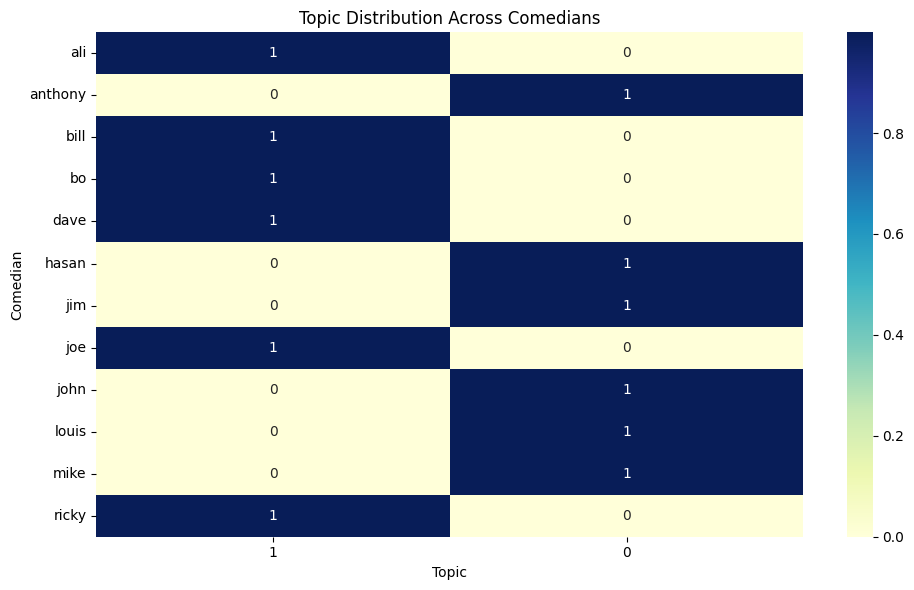

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Import the 'pyplot' module from 'matplotlib'

# Get topic distribution for each doc (comedian)
topic_dist = [dict(ldan.get_document_topics(doc)) for doc in corpusn]
topic_df = pd.DataFrame(topic_dist).fillna(0)
topic_df.index = data_dtmn.index  # Comedian names
plt.figure(figsize=(10, 6))
sns.heatmap(topic_df, cmap="YlGnBu", annot=True)
plt.title("Topic Distribution Across Comedians")
plt.xlabel("Topic")
plt.ylabel("Comedian")
plt.tight_layout()
plt.show()



Comedians ali, bill, bo, dave, and joe are strongly associated with topic 0 but not with topic 1

Comedians anthony, hasan, jim, john, and louis (partially visible) are strongly associated with topic 1 but not with topic 0

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"dad" + 0.006*"life" + 0.006*"shes" + 0.006*"night" + 0.006*"point" + 0.006*"school" + 0.006*"way" + 0.006*"parents" + 0.005*"cause" + 0.005*"girl"'),
 (1,
  '0.010*"thing" + 0.009*"day" + 0.008*"life" + 0.008*"hes" + 0.007*"way" + 0.007*"shit" + 0.007*"man" + 0.007*"joke" + 0.006*"things" + 0.006*"lot"'),
 (2,
  '0.011*"shit" + 0.010*"man" + 0.009*"day" + 0.009*"fuck" + 0.009*"thing" + 0.007*"cause" + 0.007*"gon" + 0.007*"guy" + 0.007*"hes" + 0.007*"life"')]

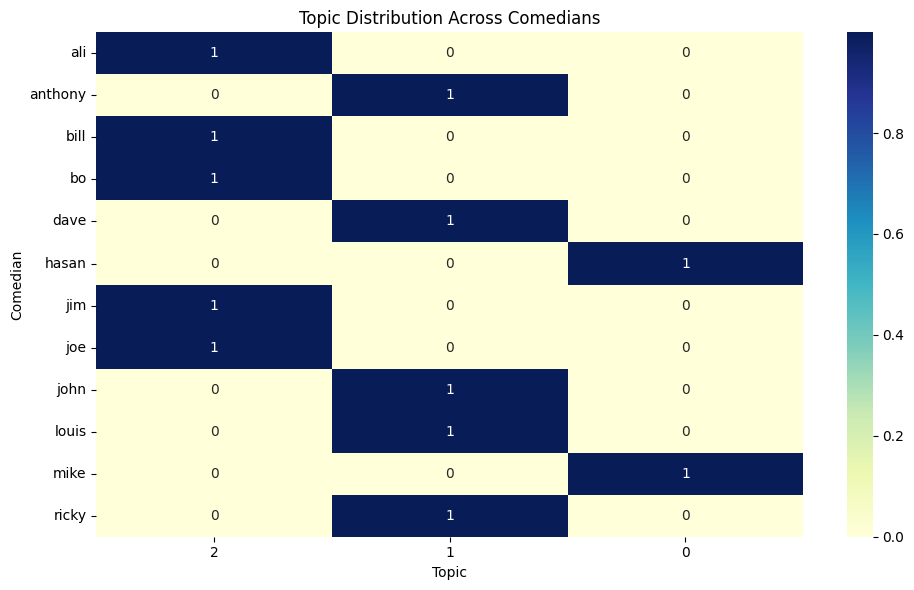

In [ ]:
import seaborn as sns
import pandas as pd

# Get topic distribution for each doc (comedian)
topic_dist = [dict(ldan.get_document_topics(doc)) for doc in corpusn]
topic_df = pd.DataFrame(topic_dist).fillna(0)
topic_df.index = data_dtmn.index  # Comedian names
plt.figure(figsize=(10, 6))
sns.heatmap(topic_df, cmap="YlGnBu", annot=True) #cmap=color map
plt.title("Topic Distribution Across Comedians")
plt.xlabel("Topic")
plt.ylabel("Comedian")
plt.tight_layout()
plt.show()


Topic 2 ---> ali,bill,bo,jim,joe

Topic 1 ---> anthony,dave,john,louis,ricky

Topic 0 ---> hasan,mike

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"clinton" + 0.008*"mom" + 0.007*"way" + 0.007*"day" + 0.007*"hey" + 0.007*"cow" + 0.006*"wife" + 0.006*"dad" + 0.006*"house" + 0.005*"cause"'),
 (1,
  '0.016*"shit" + 0.010*"man" + 0.009*"fuck" + 0.009*"guy" + 0.008*"hes" + 0.007*"gon" + 0.007*"dude" + 0.007*"thing" + 0.006*"woman" + 0.006*"way"'),
 (2,
  '0.010*"day" + 0.008*"thing" + 0.007*"hes" + 0.007*"cause" + 0.006*"shes" + 0.006*"life" + 0.006*"way" + 0.006*"years" + 0.005*"lot" + 0.005*"dad"'),
 (3,
  '0.011*"life" + 0.010*"thing" + 0.009*"man" + 0.008*"fuck" + 0.008*"shit" + 0.008*"day" + 0.007*"way" + 0.007*"things" + 0.007*"cause" + 0.007*"hes"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

By adding adjectives can capture more of the descriptive context of the comedians' language

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi wel...
anthony,thank san francisco thank good people surprise...
bill,right thank thank pleasure greater atlanta geo...
bo,old macdonald farm e i i o farm pig e i i snor...
dave,dirty jokes living stare most hard work profou...
hasan,whats davis whats im home i netflix special la...
jim,ladies gentlemen welcome stage mr jim jefferie...
joe,ladies gentlemen joe fuck san francisco thanks...
john,right petunia august thats good right hello he...
louis,music lets lights lights thank much i i i nice...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
# max_df set to 0.8, which means you're removing words that appear in more than 80% of the documents
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abject,able,...,ze,zealand,zee,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"mom" + 0.003*"clinton" + 0.003*"jenny" + 0.003*"parents" + 0.003*"friend" + 0.002*"ass" + 0.002*"husband" + 0.002*"dick" + 0.002*"president" + 0.002*"cow"'),
 (1,
  '0.005*"joke" + 0.003*"son" + 0.003*"gun" + 0.003*"comedy" + 0.003*"mom" + 0.003*"parents" + 0.003*"jokes" + 0.002*"hell" + 0.002*"dog" + 0.002*"door"')]

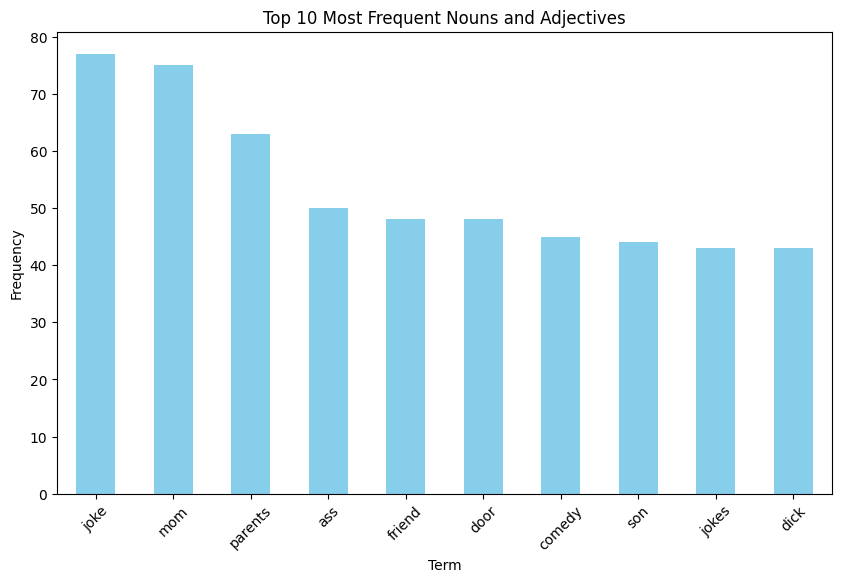

In [ ]:
import matplotlib.pyplot as plt

# Sum the counts for each term across all documents (comedian transcripts)
term_frequencies = data_dtmna.sum(axis=0)

# Sort the terms by frequency in descending order
sorted_terms = term_frequencies.sort_values(ascending=False)

# Get the top 10 most frequent terms
top_terms = sorted_terms.head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Nouns and Adjectives')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"bo" + 0.003*"mom" + 0.003*"door" + 0.003*"son" + 0.003*"hasan" + 0.003*"um" + 0.003*"repeat" + 0.003*"guns" + 0.003*"ahah" + 0.003*"ass"'),
 (1,
  '0.004*"joke" + 0.004*"parents" + 0.003*"jenny" + 0.003*"clinton" + 0.003*"wife" + 0.003*"mom" + 0.003*"dog" + 0.003*"hell" + 0.003*"nuts" + 0.003*"dead"'),
 (2,
  '0.008*"joke" + 0.006*"anthony" + 0.005*"husband" + 0.005*"mom" + 0.005*"grandma" + 0.004*"ok" + 0.004*"mad" + 0.003*"jokes" + 0.003*"pregnant" + 0.003*"shark"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"wife" + 0.004*"bo" + 0.004*"gay" + 0.003*"clinton" + 0.003*"repeat" + 0.003*"ahah" + 0.003*"mom" + 0.003*"young" + 0.003*"dog" + 0.003*"eye"'),
 (1,
  '0.010*"joke" + 0.005*"jenny" + 0.004*"jokes" + 0.004*"anthony" + 0.003*"dead" + 0.003*"twitter" + 0.003*"parents" + 0.003*"friend" + 0.003*"nuts" + 0.003*"grandma"'),
 (2,
  '0.005*"mom" + 0.005*"ass" + 0.004*"hasan" + 0.004*"guns" + 0.003*"door" + 0.003*"class" + 0.003*"parents" + 0.003*"husband" + 0.003*"dick" + 0.003*"son"'),
 (3,
  '0.000*"mom" + 0.000*"ass" + 0.000*"dick" + 0.000*"parents" + 0.000*"dog" + 0.000*"worst" + 0.000*"food" + 0.000*"date" + 0.000*"dead" + 0.000*"gun"')]

## Identify Topics in Each Document

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.004*"dick" + 0.004*"jesus" + 0.004*"tit" + 0.003*"stupid" + 0.003*"religion" + 0.003*"gun" + 0.003*"anybody" + 0.003*"sense" + 0.003*"dog" + 0.003*"older"'),
 (1,
  '0.008*"bo" + 0.007*"repeat" + 0.006*"ahah" + 0.006*"gay" + 0.005*"eye" + 0.005*"contact" + 0.005*"nigga" + 0.004*"cos" + 0.004*"um" + 0.004*"comedy"'),
 (2,
  '0.007*"mom" + 0.007*"parents" + 0.004*"joke" + 0.004*"friend" + 0.004*"hasan" + 0.004*"jenny" + 0.004*"clinton" + 0.003*"anthony" + 0.003*"york" + 0.003*"comedy"'),
 (3,
  '0.005*"joke" + 0.005*"ass" + 0.004*"guns" + 0.004*"cunt" + 0.003*"husband" + 0.003*"girlfriend" + 0.003*"pregnant" + 0.003*"ok" + 0.003*"business" + 0.003*"class"')]

Topic 0

→ Words like "dick", "jesus", "tit", "stupid", "religion", "gun"

→ Theme: Likely about controversial topics, religion, and offensive jokes.



Topic 1

→ Words like "bo", "repeat", "gay", "eye contact", "nigga", "comedy"

→ Theme: Likely about stage performance, awkwardness, and identity.

Topic 2

→ Words like "mom", "parents", "friend", "hasan", "comedy", "joke"

→ Theme: Likely about family relationships, friends, and personal life stories.

Topic 3

→ Words like "joke", "ass", "guns", "cunt", "husband", "girlfriend", "pregnant"

→ Theme: Likely about adult jokes, relationships, and life events (pregnancy, marriage).

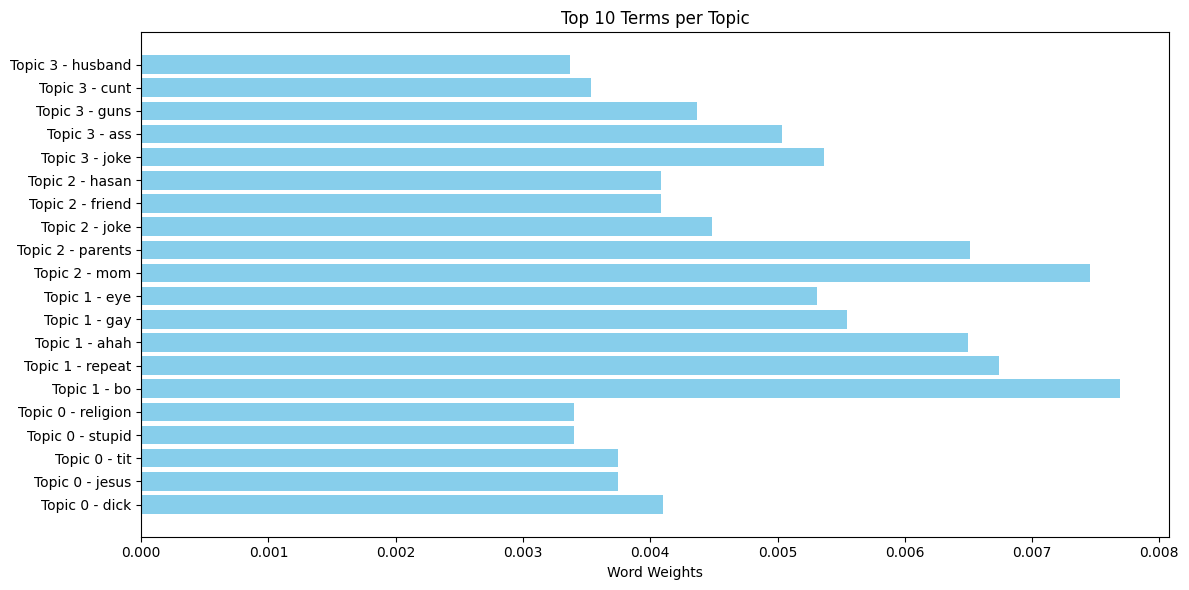

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 terms per topic
num_words = 5
topics = ldana.show_topics(num_topics=4, num_words=num_words, formatted=False)

# Prepare data for plotting
topic_words = []
word_weights = []
for i in range(4):
    for word, weight in topics[i][1]:
        topic_words.append(f'Topic {i} - {word}')
        word_weights.append(weight)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(topic_words, word_weights, color='skyblue')
plt.xlabel('Word Weights')
plt.title('Top 10 Terms per Topic')
plt.tight_layout()
plt.show()


In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(3, 'ali'),
 (2, 'anthony'),
 (0, 'bill'),
 (1, 'bo'),
 (1, 'dave'),
 (2, 'hasan'),
 (3, 'jim'),
 (0, 'joe'),
 (2, 'john'),
 (0, 'louis'),
 (2, 'mike'),
 (3, 'ricky')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 3: louis
* Topic 2: ali,bo,joe
* Topic 0: anthony,bill,hasan,jim,mike
* Topic 1: dave,john,ricky

## Additional Exercises

1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

In [ ]:
from gensim import models
# Alpha controls the sparsity of the topic distributions, and beta controls the sparsity of the word distributions.
# Modifying parameters for better topic extraction

ldaa = models.LdaModel(corpus=corpus,
                      id2word=id2word,
                      num_topics=5,  # Try more topics
                      passes=20,     # Increase passes for better convergence
                      alpha='auto',  # Set alpha to 'auto' to improve model fitting
                      eta=0.01)     # Reduce eta for more specific topic-word associations

ldaa.print_topics()

[(0,
  '0.008*"cause" + 0.007*"shit" + 0.006*"life" + 0.006*"hes" + 0.006*"thing" + 0.006*"really" + 0.005*"day" + 0.005*"theyre" + 0.005*"little" + 0.005*"old"'),
 (1,
  '0.011*"fucking" + 0.010*"say" + 0.009*"went" + 0.009*"id" + 0.008*"didnt" + 0.007*"little" + 0.007*"joke" + 0.007*"theyre" + 0.007*"hes" + 0.007*"ive"'),
 (2,
  '0.000*"fuck" + 0.000*"going" + 0.000*"theyre" + 0.000*"say" + 0.000*"fucking" + 0.000*"shit" + 0.000*"didnt" + 0.000*"cause" + 0.000*"good" + 0.000*"want"'),
 (3,
  '0.014*"fucking" + 0.010*"fuck" + 0.010*"shit" + 0.007*"theyre" + 0.006*"didnt" + 0.006*"going" + 0.006*"say" + 0.006*"man" + 0.006*"thing" + 0.005*"day"'),
 (4,
  '0.008*"want" + 0.008*"love" + 0.007*"going" + 0.006*"dad" + 0.006*"say" + 0.005*"says" + 0.005*"good" + 0.005*"really" + 0.004*"did" + 0.004*"goes"')]

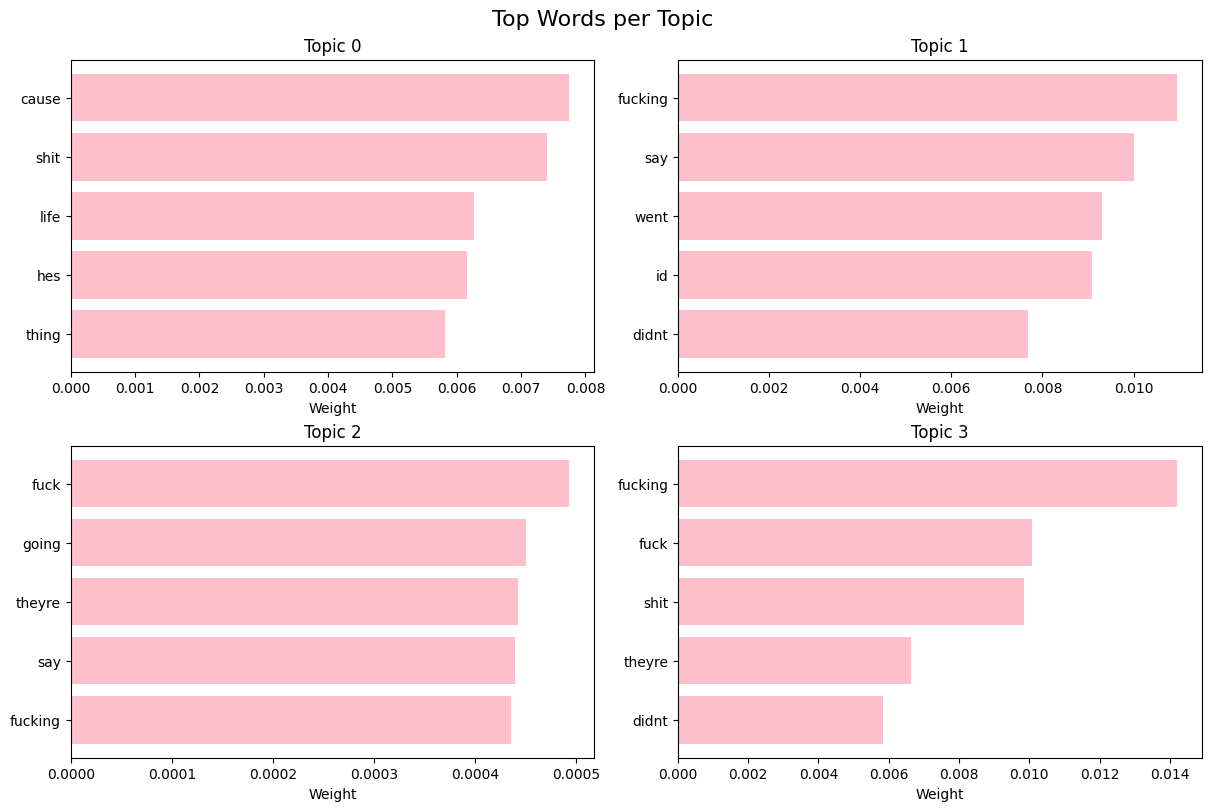

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get topics with top terms and weights
topics = ldaa.show_topics(formatted=False)
topn = 5
topics = topics[:4]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), constrained_layout=True) #constrained_layout=true avoid overlapping
fig.suptitle("Top Words per Topic ", fontsize=16)

axs = axs.flatten()

# Plot each topic
for i, (topic_id, terms) in enumerate(topics):
    words = [word for word, weight in terms[:topn]]
    weights = [weight for word, weight in terms[:topn]]

    axs[i].barh(words, weights, color='pink')
    axs[i].invert_yaxis()
    axs[i].set_title(f"Topic {topic_id}")
    axs[i].set_xlabel("Weight")


plt.show()



In [ ]:
from nltk import word_tokenize, pos_tag

def nouns_and_verbs(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and verbs.'''
    is_noun_or_verb = lambda pos: pos[:2] in ['NN', 'VB']
    tokenized = word_tokenize(text)
    all_nouns_verbs = [word for (word, pos) in pos_tag(tokenized) if is_noun_or_verb(pos)]
    return ' '.join(all_nouns_verbs)

In [ ]:
# Apply the function to extract nouns and verbs
data_nouns_verbs = pd.DataFrame(data_clean.transcript.apply(nouns_and_verbs))

# Create a new document-term matrix using only nouns and verbs
cvnv = CountVectorizer(stop_words=stop_words)
data_cvnv = cvnv.fit_transform(data_nouns_verbs.transcript)
data_dtmnv = pd.DataFrame(data_cvnv.toarray(), columns=cvnv.get_feature_names_out())
data_dtmnv.index = data_nouns_verbs.index

In [ ]:
# Create the gensim corpus
corpusnv = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmnv.transpose()))

# Create the vocabulary dictionary
id2wordnv = dict((v, k) for k, v in cvnv.vocabulary_.items())

# Build a topic model using LDA with the new DTM that includes nouns and verbs
lda_nv = models.LdaModel(corpus=corpusnv,
                         id2word=id2wordnv,
                         num_topics=4,
                         passes=20)

lda_nv.print_topics()

[(0,
  '0.011*"life" + 0.008*"thing" + 0.008*"gon" + 0.008*"hes" + 0.008*"theres" + 0.007*"cause" + 0.005*"shit" + 0.005*"course" + 0.005*"kids" + 0.005*"murder"'),
 (1,
  '0.008*"shit" + 0.008*"fucking" + 0.007*"fuck" + 0.007*"say" + 0.007*"gon" + 0.007*"going" + 0.006*"didnt" + 0.006*"man" + 0.006*"hes" + 0.006*"want"'),
 (2,
  '0.010*"says" + 0.008*"cause" + 0.007*"goes" + 0.006*"point" + 0.006*"gon" + 0.006*"mean" + 0.005*"kind" + 0.005*"say" + 0.005*"id" + 0.005*"jenny"'),
 (3,
  '0.010*"fucking" + 0.009*"gon" + 0.007*"day" + 0.007*"say" + 0.007*"went" + 0.006*"thing" + 0.006*"want" + 0.006*"going" + 0.006*"shit" + 0.006*"fuck"')]

In [ ]:
from nltk import word_tokenize, pos_tag

def adjectives_and_verbs(text):
    '''Tokenize and extract only adjectives and verbs from the text.'''
    is_adj_or_verb = lambda pos: pos[:2] in ['JJ', 'VB']
    tokenized = word_tokenize(text)
    adj_verb = [word for (word, pos) in pos_tag(tokenized) if is_adj_or_verb(pos)]
    return ' '.join(adj_verb)


In [ ]:
data_adj_verb = pd.DataFrame(data_clean.transcript.apply(adjectives_and_verbs))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv_av = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cv_av = cv_av.fit_transform(data_adj_verb.transcript)

data_dtm_av = pd.DataFrame(data_cv_av.toarray(), columns=cv_av.get_feature_names_out())
data_dtm_av.index = data_adj_verb.index


In [ ]:
from gensim import matutils
import scipy.sparse

corpus_av = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm_av.transpose()))
id2word_av = dict((v, k) for k, v in cv_av.vocabulary_.items())


In [ ]:
from gensim import models

lda_av = models.LdaModel(corpus=corpus_av,
                         id2word=id2word_av,
                         num_topics=4,
                         passes=50,
                         alpha='auto',
                         eta=0.01)

lda_av.print_topics()


[(0,
  '0.008*"hasan" + 0.007*"hed" + 0.005*"wan" + 0.005*"stupid" + 0.004*"dead" + 0.004*"born" + 0.004*"dad" + 0.004*"lived" + 0.004*"high" + 0.004*"god"'),
 (1,
  '0.007*"understand" + 0.007*"hate" + 0.005*"sleep" + 0.005*"ok" + 0.005*"wan" + 0.005*"um" + 0.005*"dead" + 0.005*"bring" + 0.005*"prolonged" + 0.005*"called"'),
 (2,
  '0.008*"walked" + 0.007*"married" + 0.006*"ahah" + 0.006*"met" + 0.006*"uh" + 0.006*"sure" + 0.005*"long" + 0.005*"wan" + 0.005*"called" + 0.005*"dave"'),
 (3,
  '0.000*"understand" + 0.000*"sure" + 0.000*"uh" + 0.000*"hit" + 0.000*"bring" + 0.000*"married" + 0.000*"dead" + 0.000*"wan" + 0.000*"called" + 0.000*"met"')]

Key words: hasan, dad, born, lived, god, stupid.

Theme: Seems related to family, life stories, religious or philosophical topics (god, born, dead).



Key words: understand, hate, sleep, ok, dead, bring.

Theme: Likely about emotions, complaints, and everyday life struggles (sleep issues, hatred, confusion).

Key words: walked, married, met, ahah (laughing), sure, called.

Theme: Likely about relationship stories, marriage, meeting people, and funny incidents.